In [1]:
# Step 1: Import Libraries

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [46]:
# Step 2: Load Data

In [47]:
from tensorflow.keras.datasets import mnist

In [48]:
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

In [49]:
train_images.shape

(60000, 28, 28)

In [50]:
train_images[25].shape

(28, 28)

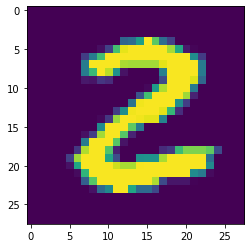

In [51]:
plt.figure()
plt.imshow(train_images[25])

In [52]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0

In [53]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

In [54]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [55]:
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
# Step 3: Build the neural network model

In [57]:
model = models.Sequential()

In [58]:
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28, 1)))

In [59]:
model.add(layers.MaxPooling2D((2, 2)))

In [60]:
model.add(layers.Conv2D(64, (5, 5), activation='relu'))

In [61]:
model.add(layers.MaxPooling2D((2, 2)))

In [62]:
model.add(layers.Flatten())

In [63]:
model.add(layers.Dense(10, activation='softmax'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
____________________________________________________

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [66]:
# Step 4: Train the model

In [67]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 224s 118ms/step - loss: 0.4547 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 231s 123ms/step - loss: 0.1371 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 252s 135ms/step - loss: 0.0978 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0788 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 248s 133ms/step - loss: 0.0676 - accuracy: 0.9800


In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 15s 46ms/step - loss: 0.0538 - accuracy: 0.9824


In [69]:
# Step 7: Predictions

In [70]:
predictions = model.predict(test_images)

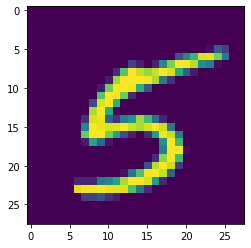

In [86]:
plt.figure()
plt.imshow(test_images[52])

In [83]:
predictions[52]

array([6.3579988e-11, 2.2594071e-12, 5.3415130e-09, 1.7206174e-05,
       6.6194923e-13, 9.9996114e-01, 2.9826924e-07, 1.7376546e-13,
       1.9889283e-05, 1.4293690e-06], dtype=float32)

([<matplotlib.axis.XTick at 0x2af813b0730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

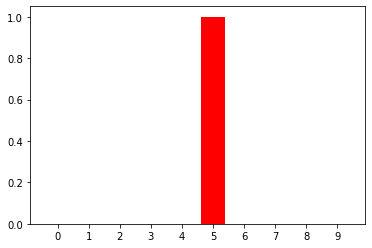

In [87]:
plt.figure()
plt.bar(range(10), predictions[52], color="#ff0000")
plt.xticks(range(10))

In [89]:
# Step 8: Save the model

In [90]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets
